In [43]:
import numpy as np
from scipy import optimize
import statistics as st
 
r = np.array([0.945532630498276,
              0.614772790142383,
              0.834417758890680,
              0.862344782601800,
              0.555858715401929,
              0.641058419842652,
              0.720118656981704,
              0.643948007732270,
              0.138790608092353,
              0.279264178231250,
              0.993836948076485,
              0.531967023876420,
              0.964455754192395,
              0.873171802181126,
              0.937828816793698])
 
def GARCH11_logL(param, r):
    omega, alpha, beta = param
    n = len(r)
    s = np.ones(n)*0.01
    s[2] = st.variance(r[0:3])
    for i in range(3, n):
        s[i] = omega + alpha*r[i-1]**2 + beta*(s[i-1])  # GARCH(1,1) model
    logL = -((-np.log(s) - r**2/s).sum())
    return logL

In [44]:
o = optimize.fmin(GARCH11_logL,np.array([.1,.1,.1]), args=(r,), full_output=1)
#optimize.fmin(func, x0, args, opt is true output)

Optimization terminated successfully.
         Current function value: 143.208338
         Iterations: 117
         Function evaluations: 216


### Quandl 사용한 Garch분석

In [3]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [4]:
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.filters.filtertools import miso_lfilter
import statsmodels
from statsmodels.sandbox.tsa.garch import *

%matplotlib inline

In [5]:
#Using Quandl

import Quandl
data = Quandl.get("YAHOO/INDEX_KS11")

In [6]:
data.tail()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2016-04-25,2016.050049,2016.650024,2007.180054,2014.550049,397700,2014.550049
2016-04-26,2013.260010,2021.589966,2011.849976,2019.630005,509300,2019.630005
2016-04-27,2019.310059,2019.859985,2012.750000,2015.400024,412800,2015.400024
2016-04-28,2020.829956,2022.989990,1998.599976,2000.930054,341100,2000.930054
2016-04-29,1998.680054,1999.339966,1983.300049,1994.150024,401100,1994.150024


In [7]:
len(data)

4654

In [8]:
data_close = data['Close']
ret = np.diff(np.log(data_close))[-2000:]*1000  #대수분포 변환

In [9]:
len(ret)

2000

In [10]:
ggmod = Garch(ret - ret.mean())
ggmod.nar =1
ggmod.nma = 1

ggmod._start_parms = np.array([-0.1, 0.1, 0.1, 0.1])

In [11]:
ggres = ggmod.fit(start_params=np.array([-0.1, 0.1, 0.1, 0.0]), maxiter=1000, method='bfgs')

         Current function value: 7506.685531
         Iterations: 69
         Function evaluations: 505
         Gradient evaluations: 84


In [12]:
print('ggres.params', ggres.params)

ggres.params [-0.83162191 -0.01750607 -0.25959949 -4.64648077]


### garchPlot representation Garch(1,1)

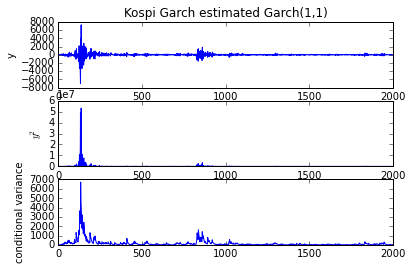

In [28]:
garchplot(ggmod.errorsest, ggmod.h, title="Kospi Garch estimated Garch(1,1)")

In [29]:
ret.var()

176.91481308637961

In [30]:
ggmod0 = Garch0(ret-ret.mean())
ggmod0.nar = 1
ggmod.nma = 1
start_params = np.array([-0.1,0.1, ret.var()])

In [31]:
ggmod0._start_params = start_params
ggres0 = ggmod0.fit(start_params=start_params, maxiter=2000)
print("ggres0.params",ggres0.params)

Optimization terminated successfully.
         Current function value: 7511.474095
         Iterations: 173
         Function evaluations: 342
ggres0.params [ -0.92096815   0.07126066  15.15292494]


In [33]:
gllres = optimize.fmin(lambda params: -loglike_GARCH11(params, ret - ret.mean())[0], [0.01, 0.1, 0.1])

Optimization terminated successfully.
         Current function value: 7511.593415
         Iterations: 168
         Function evaluations: 304


In [34]:
print(gllres)

[ 1.07863241  0.07120129  0.92101568]


In [35]:
llf = loglike_GARCH11(gllres, ret-ret.mean())
print(llf[0])

-7511.59341487


In [36]:
ggmod0 = Garch0(ret-ret.mean())

In [37]:
ggmod0.nar =2
ggmod.nma =2
start_params = np.array([-0.1,-0.1,0.1,0.1, ret.var()])

In [38]:
ggmod0._start_params = start_params
ggres0 = ggmod0.fit(start_params=start_params, maxiter=2000)
print('ggres0.params', ggres0.params)

Optimization terminated successfully.
         Current function value: 7510.726663
         Iterations: 432
         Function evaluations: 770
ggres0.params [ -1.18431429   0.2472298    0.05660231   0.375272    15.54836822]


In [40]:
ggmod = Garch(ret - ret.mean())
ggmod.nar = 2
ggmod.nma = 2
start_params = np.array([-0.1,-0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
ggmod._start_params = start_params

In [41]:
ggres = ggmod.fit(start_params=start_params, maxiter=1000)

In [46]:
ggres.params

array([-0.37463361, -0.53920386, -0.05777341,  0.08080737,  0.14032259,
       -0.01492637,  0.27700837])

In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
from statsmodels.tsa.filters.filtertools import miso_lfilter
import statsmodels
from statsmodels.sandbox.tsa.garch import *

%matplotlib inline

In [3]:
#Using Quandl

import Quandl
data = Quandl.get("YAHOO/KS_005930")

In [5]:
data.tail()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2016-04-25,1285000,1285000,1271000,1281000,91900,1281000
2016-04-26,1285000,1305000,1283000,1296000,166900,1296000
2016-04-27,1294000,1300000,1286000,1300000,165900,1300000
2016-04-28,1300000,1300000,1261000,1265000,293000,1265000
2016-04-29,1260000,1267000,1242000,1245000,325000,1245000


In [6]:
len(data)

4237

In [7]:
data_close = data['Close']
ret = np.diff(np.log(data_close))[-2000:]*1000  #대수분포 변환

In [8]:
len(ret)

2000

In [9]:
ggmod = Garch(ret - ret.mean())
ggmod.nar =1
ggmod.nma = 1

ggmod._start_parms = np.array([-0.1, 0.1, 0.1, 0.1])

In [10]:
ggres = ggmod.fit(start_params=np.array([-0.1, 0.1, 0.1, 0.0]), maxiter=1000, method='bfgs')

         Current function value: 8614.191346
         Iterations: 62
         Function evaluations: 774
         Gradient evaluations: 127


In [11]:
print('ggres.params', ggres.params)

ggres.params [-0.9539329   0.00899959  0.04999747  4.41085519]


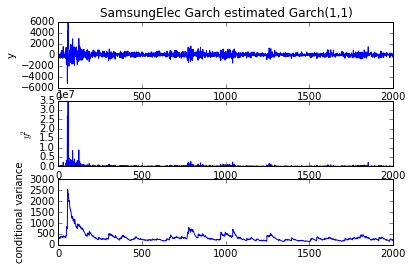

In [12]:
garchplot(ggmod.errorsest, ggmod.h, title="SamsungElec Garch estimated Garch(1,1)")

In [14]:
ggmod.fit

<bound method TSMLEModel.fit of <statsmodels.sandbox.tsa.garch.Garch object at 0x000000000BDE89E8>>

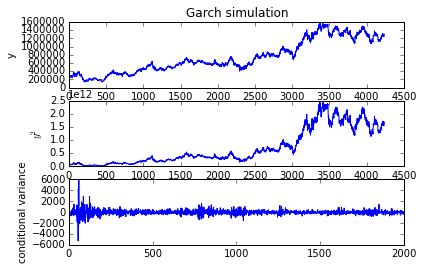

In [31]:
garchplot(data["Close"],ggmod.errorsest)